<a href="https://colab.research.google.com/github/Material-Educativo/Tecnicas-heuristicas/blob/main/Evolucion_diferencial_vs_Alpine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Función Alpine
Empecemos viendo la regla de correspondencia y gráfica de la función Alpine.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math
import matplotlib.animation as animation
from IPython.display import Video  # Para mostrar el video en Colab

In [63]:
def rastrigin(x, y):
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

In [64]:
def alpine(x, y):
    return np.abs(x * np.sin(x) + 0.1 * x) + np.abs(y * np.sin(y) + 0.1 * y)

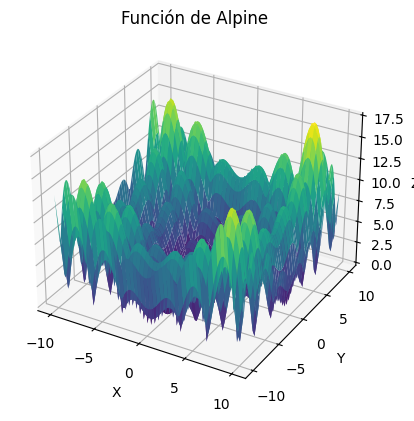

In [65]:
# Crear una malla de puntos para graficar la función
x = np.linspace(-10.0, 10.0, 100)
y = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Crear una figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título
plt.title('Función de Alpine')

# Mostrar la figura
plt.show()


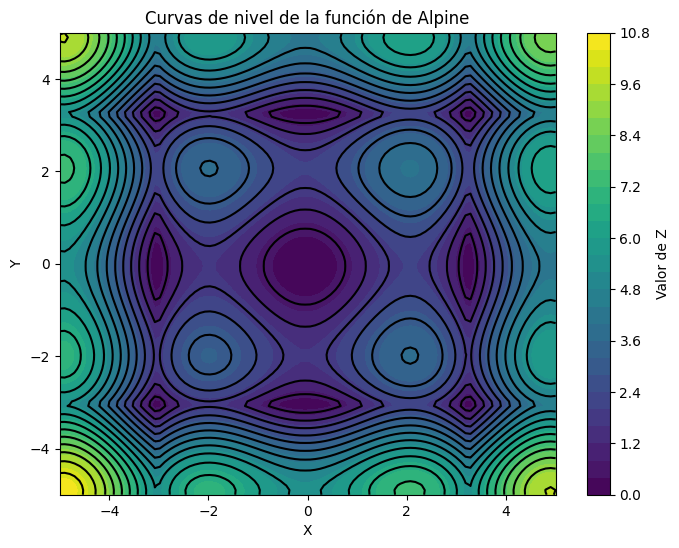

In [66]:
# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Ajusta el tamaño aquí (ancho, alto)

# Graficar las curvas de nivel con un degradado continuo
contour = plt.contourf(X, Y, Z, levels=30, cmap='viridis')  # levels ajusta la cantidad de curvas de nivel

# Graficar las curvas de nivel con líneas negras para resaltarlas
plt.contour(X, Y, Z, levels=20, colors='black')  # levels ajusta la cantidad de curvas de nivel

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title('Curvas de nivel de la función de Alpine')

# Agregar la barra de color para el valor Z
plt.colorbar(contour, label='Valor de Z')

# Mostrar la gráfica
plt.show()


# Evolución diferencial (ED)
Veamos el comportamiento de evolución diferencial con la función alpine.

In [67]:
def ED(max_iter, F, CR, tam_poblacion):
    # Inicializar la población con soluciones aleatorias dentro del rango
    rango_x = (-5, 5)
    rango_y = (-5, 5)
    poblacion = [(random.uniform(rango_x[0], rango_x[1]), random.uniform(rango_y[0], rango_y[1])) for _ in range(tam_poblacion)]

    # Evaluar la función objetivo de cada individuo
    costos = [alpine(x, y) for x, y in poblacion]

    # Guardamos la mejor solución de la población y su costo
    mejor_individuo = poblacion[np.argmin(costos)]
    mejor_valor = min(costos)

    # Guardar el historial para graficar el comportamiento del algoritmo
    historial_valores = [mejor_valor]
    coor_x = [np.array([ind[0] for ind in poblacion])]
    coor_y = [np.array([ind[1] for ind in poblacion])]

    for iteracion in range(max_iter):
        for i in range(tam_poblacion):
            # Selección de tres individuos aleatorios diferentes (r1 != r2 != r3 != i)
            r1, r2, r3 = random.sample([j for j in range(tam_poblacion) if j != i], 3)

            # Mutación: Crear una nueva solución
            diferencia = np.array(poblacion[r2]) - np.array(poblacion[r3])
            nuevo_individuo = np.array(poblacion[r1]) + F * diferencia

            # Selección aleatoria de la coordenada que se heredará del mutante
            coor_mutante = random.randint(0, 1)  # 0 para x, 1 para y

            # Cruza binomial: combinar el nuevo individuo con el actual
            x_cruza, y_cruza = [], []
            for j in range(2):  # En este ejemplo tenemos dos dimensiones
                if random.random() < CR or j == coor_mutante:  # Heredamos del mutante si CR o si es la coordenada seleccionada
                    if j == 0:
                        x_cruza.append(nuevo_individuo[0])
                    else:
                        y_cruza.append(nuevo_individuo[1])
                else:
                    if j == 0:
                        x_cruza.append(poblacion[i][0])
                    else:
                        y_cruza.append(poblacion[i][1])

            # Asegurar que las posiciones no salgan del rango
            x_cruza = np.clip(x_cruza[0], rango_x[0], rango_x[1])
            y_cruza = np.clip(y_cruza[0], rango_y[0], rango_y[1])

            # Evaluar la función objetivo del nuevo individuo
            valor_nuevo = alpine(x_cruza, y_cruza)

            # Selección: Reemplazar el individuo original si el nuevo tiene mejor valor
            if valor_nuevo < costos[i]:
                poblacion[i] = (x_cruza, y_cruza)
                costos[i] = valor_nuevo

        # Guardar el historial de la mejor solución encontrada
        mejor_individuo = poblacion[np.argmin(costos)]
        mejor_valor = min(costos)
        historial_valores.append(mejor_valor)

        # Guardar las coordenadas de la población
        coor_x.append(np.array([ind[0] for ind in poblacion]))
        coor_y.append(np.array([ind[1] for ind in poblacion]))

    return mejor_individuo[0], mejor_individuo[1], mejor_valor, historial_valores, coor_x, coor_y

In [77]:
# Parámetros del algoritmo
max_iter = 50  # Número máximo de iteraciones
tam_poblacion = 10  # Número de soluciones
F=0.5 # Factor de mutación
CR=0.7 # Taza de cruza

# Ejecutar el algoritmo ED
x, y, valor, valores, coor_x, coor_y = ED(max_iter, F, CR, tam_poblacion)

print("Mejor solución encontrada:")
print("X:", x)
print("Y:", y)
print("Valor de Alpine:", valor)

Mejor solución encontrada:
X: -1.3000388366745546e-05
Y: 1.922772273976624e-05
Valor de Alpine: 3.223011805875232e-06


# Veamos la ubicación de la mejor solución
Dado que en ED se emplean múltiples soluciones simultáneamente, resulta complicado representar su movimiento en una sola imagen. Por lo tanto, se mostrará únicamente la posición de la mejor solución conocida por el enjambre a medida que avanza el algoritmo.

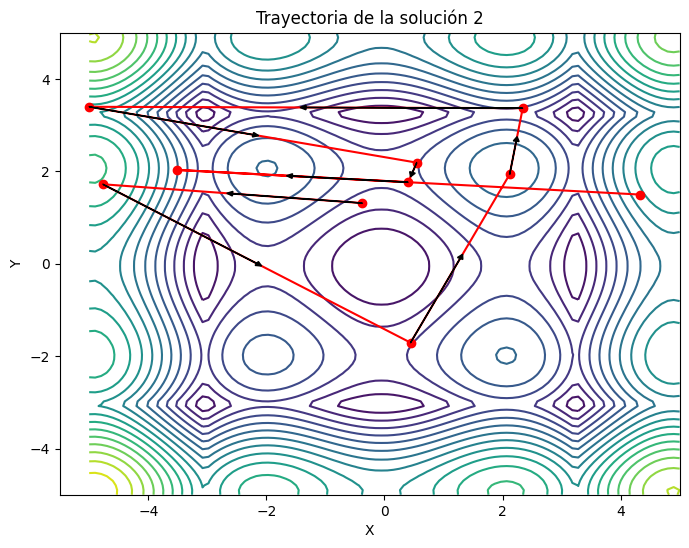

In [78]:
# Crear una malla de puntos para graficar las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))  # Ajusta el tamaño aquí (ancho, alto)

# Graficar las curvas de nivel con líneas negras para resaltarlas
plt.contour(X, Y, Z, levels=20)  # levels ajusta la cantidad de curvas de nivel

## Solución elegida
individuo = 2

## Graficar la trayectoria del primer elemento (posición 0)
plt.plot(coor_x[individuo], coor_y[individuo], color='red', marker='o', linestyle='-')

# Agregar flechas para indicar la dirección del movimiento
for i in range(1, len(coor_x[individuo]) - 1):  # Usamos x_coor[individuo] y y_coor[individuo] para el individuo elegido
    plt.arrow(coor_x[individuo][i-1], coor_y[individuo][i-1], (coor_x[individuo][i] - coor_x[individuo][i-1]) * 0.5,
              (coor_y[individuo][i] - coor_y[individuo][i-1]) * 0.5, color='black', head_width=0.1,
              head_length=0.1, zorder=10)

# Etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

# Título
plt.title(f'Trayectoria de la solución {individuo}')

# Mostrar la gráfica
plt.show()

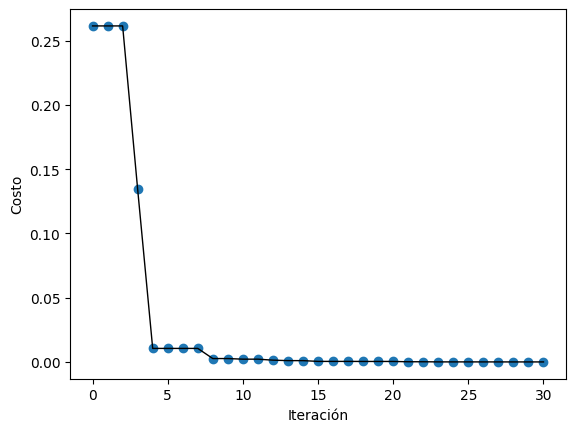

In [75]:
# La posición en la lista como valores "x"
valores_x = list(range(len(valores)))

# Conectar los puntos consecutivos con una línea negra
plt.plot(valores_x, valores, color='black', linestyle='-', linewidth=1, label='Línea')

# Crear la gráfica de dispersión
plt.scatter(valores_x, valores)

# Agregar etiquetas a los ejes
plt.xlabel("Iteración")
plt.ylabel("Costo")

# Mostrar la gráfica
plt.show()

#Veamos una animación

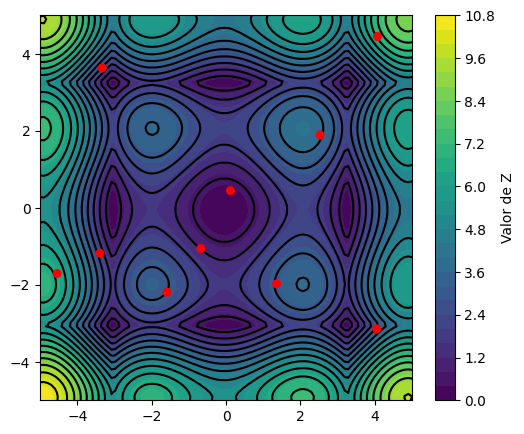

In [76]:
# Crear la malla de puntos para las curvas de nivel
x = np.linspace(-5.0, 5.0, 100)
y = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(x, y)
Z = alpine(X, Y)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las curvas de nivel con un degradado continuo
contour = ax.contourf(X, Y, Z, levels=30, cmap='viridis')  # niveles ajusta la cantidad de curvas de nivel
ax.contour(X, Y, Z, levels=20, colors='black')  # curvas de nivel con líneas negras

# Agregar la barra de color
plt.colorbar(contour, ax=ax, label='Valor de Z')


# Inicializar los círculos (color rojo para todos)
circles = [plt.Circle((coor_x[0][i], coor_y[0][i]), 0.1, color='red', zorder=5) for i in range(10)]
for circle in circles:
    ax.add_artist(circle)

# Función de actualización para la animación
def update(frame):
    # Actualizar las posiciones de los círculos (todos los círculos son rojos)
    for i, circle in enumerate(circles):
        circle.set_center((coor_x[frame][i], coor_y[frame][i]))  # Actualizar la posición de cada círculo
        # Los círculos son rojos, por lo tanto no cambiamos su color
        #circle.set_facecolor('red')  # Mantener el color rojo
    return circles

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=len(coor_x), interval=50, blit=False)

# Guardar la animación como archivo MP4
ani.save('animacion.mp4', writer='ffmpeg', fps=1)

# Mostrar el video dentro de Google Colab
Video('animacion.mp4', embed=True)